# import library

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import matplotlib
# import plotly.plotly as py
# import plotly.graph_objs as go
import time
import seaborn as sns

pd.options.display.max_columns = 999
pd.options.display.float_format = '{:,.3f}'.format

# read file

In [2]:
df = pd.read_csv("../data/processed/Propwall_Report_ForRent-28-3-18.csv")
df["State"] = df.State.apply(lambda x: x if x != 'Petaling Jaya' else 'Selangor')
df["State"] = df.State.apply(lambda x: x if x != 'Labuan' else 'Sabah')
#add column of quarter and year-quarter
df['quarter'] = ((df['month']-1)//3+1)

df['year-quarter'] = df['year'].astype(str) + '-' + df['quarter'].astype(str)

In [3]:
df_KL = df[df['State'] == "Kuala Lumpur"].groupby('year-quarter')['price'].mean()

In [25]:
df['posting_day'] = pd.to_datetime(df['posting_date']).map(lambda x:str(x.day) + '/' + str(x.month) + '/' + str(x.year))

In [21]:
df.groupby('year-quarter')['State'].count()\
.to_excel('../data/excel/numlistings_rental.xlsx')

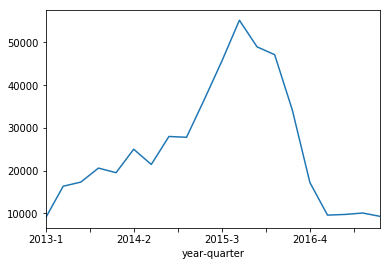

In [22]:
df.groupby('year-quarter')['State'].count().plot()

In [5]:
#household num dict - DOSM 2016
householdnum_dict = {'Johor':834.1,
                    'Kedah':477.6,
                    'Kelantan':336.3,
                    'Melaka':199.6,
                    'Negeri Sembilan':254.0,
                    'Pahang':330.7,
                    'Penang':430.8,
                    'Perak':619.0,
                    'Perlis':56.3,
                    'Selangor':1550.5,
                    'Terengganu':238.8,
                    'Sabah':493.1,
                    'Sarawak':603.6,
                    'Kuala Lumpur':461.6}
#household median income - DOSM 2016
householdinc_dict = {'Johor':5652,
                    'Kedah':3811,
                    'Kelantan':3079,
                    'Melaka':5588,
                    'Negeri Sembilan':4579,
                    'Pahang':3979,
                    'Penang':5409,
                    'Perak':4006,
                    'Perlis':4204,
                    'Selangor':7225,
                    'Terengganu':4694,
                    'Sabah':4110,
                    'Sarawak':4163,
                    'Kuala Lumpur':9073}

In [9]:
df2 = df.groupby('State')['price'].median().reset_index()
df2['NumHousehold'] = df2['State'].map(lambda x:householdnum_dict[x])

def getRatio(state_array,medianInc_array):
    return np.array([j/householdinc_dict[state_array[i]] for i,j in enumerate(medianInc_array)])
df2['ratioRenttoInc'] = getRatio(np.array(df2['State']),np.array(df2['price']))

df2['numListings'] = df2['State'].map(lambda x:dict(df.groupby('State')['Location_property'].count())[x])

df2['price_persqft'] = df2['State'].map(lambda x:
                                        dict(df.groupby('State')['Price_persqft'].median())[x])

In [19]:
df2.sort_values('NumHousehold',ascending = False)\
.to_excel('../data/excel/ratioRenttoInc_Bystate_sortNumHousehold.xlsx')

df2[['State','price_persqft']].sort_values('price_persqft',ascending = False)\
.to_excel('../data/excel/pricepersqft_Bystate_sortpricepersqft.xlsx')

df2[['State','NumHousehold','price_persqft']].sort_values('NumHousehold',ascending = False)\
.to_excel('../data/excel/pricepersqft_Bystate_sortNumHousehold.xlsx')

In [6]:
#2016
df2_2016 = df[df['year'] == 2016].groupby('State')['price'].median().reset_index()
df2_2016['NumHousehold'] = df2_2016['State'].map(lambda x:householdnum_dict[x])

def getRatio(state_array,medianInc_array):
    return np.array([j/householdinc_dict[state_array[i]] for i,j in enumerate(medianInc_array)])
df2_2016['ratioRenttoInc'] = getRatio(np.array(df2_2016['State']),np.array(df2_2016['price']))
df2_2016['numListings'] = df2_2016['State'].map(lambda x:dict(df[df['year'] == 2016]\
                                                    .groupby('State')['Location_property'].count())[x])
df2_2016['price_persqft'] = df2_2016['State'].map(lambda x:
                                        dict(df[df['year'] == 2016].groupby('State')['Price_persqft'].median())[x])

In [19]:
df2_2016

State     price  NumHousehold  ratioRenttoInc  numListings  \
0             Johor 1,800.000       834.100           0.318         5432   
1             Kedah 1,600.000       477.600           0.420         2012   
2          Kelantan 4,000.000       336.300           1.299          451   
3      Kuala Lumpur 1,900.000       461.600           0.209        39244   
4            Melaka 2,400.000       199.600           0.429         1045   
5   Negeri Sembilan 1,900.000       254.000           0.415         5386   
6            Pahang 1,800.000       330.700           0.452         3703   
7            Penang 1,900.000       430.800           0.351        17873   
8             Perak 1,600.000       619.000           0.399         6049   
9            Perlis 1,600.000        56.300           0.381          227   
10            Sabah 1,800.000       493.100           0.438         2722   
11          Sarawak 1,700.000       603.600           0.408         1490   
12         Selangor 1,900.000     1,550.500           0.263        61537   
13       Terengganu 1,350.000       238.800           0.288          411   

    price_persqft  
0           1.692  
1           1.856  
2           1.965  
3           1.812  
4           2.143  
5           2.000  
6           1.837  
7           1.750  
8           1.630  
9           2.013  
10          1.978  
11          1.360  
12          1.768  
13          2.592

In [7]:
df2_2016.sort_values('NumHousehold',ascending = False)\
.to_excel('../data/excel/ratioRenttoInc_Bystate_sortNumHousehold_2016.xlsx')

df2_2016[['State','price_persqft']].sort_values('price_persqft',ascending = False)\
.to_excel('../data/excel/pricepersqft_Bystate_sortpricepersqft_2016.xlsx')

df2_2016[['State','NumHousehold','price_persqft']].sort_values('NumHousehold',ascending = False)\
.to_excel('../data/excel/pricepersqft_Bystate_sortNumHousehold_2016.xlsx')

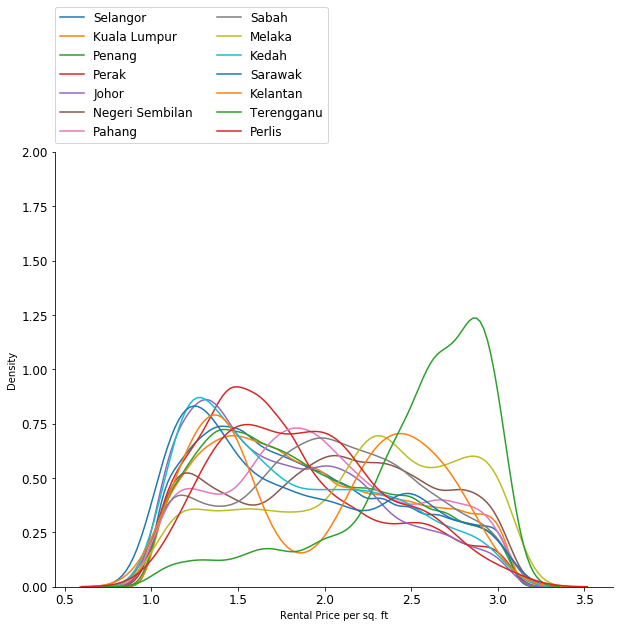

In [13]:
plt.figure(figsize = (10,8))
for i in df2.sort_values('numListings',ascending = False)['State']:
    g = sns.distplot(df[df['State'] == i]['Price_persqft'],hist = False,label = i)
    g.set(ylim = (0, 2))
plt.grid(False)
sns.despine()
plt.legend(bbox_to_anchor=(0., 1.02, 0., .102), loc=3,
           ncol=2, borderaxespad=0.,fontsize = 12)
plt.ylabel('Density')
plt.xlabel('Rental Price per sq. ft')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('../data/processed/distribution_rentalpersqft_byState_sortHousehold.png',bbox_inches = 'tight',
           dpi = 140)

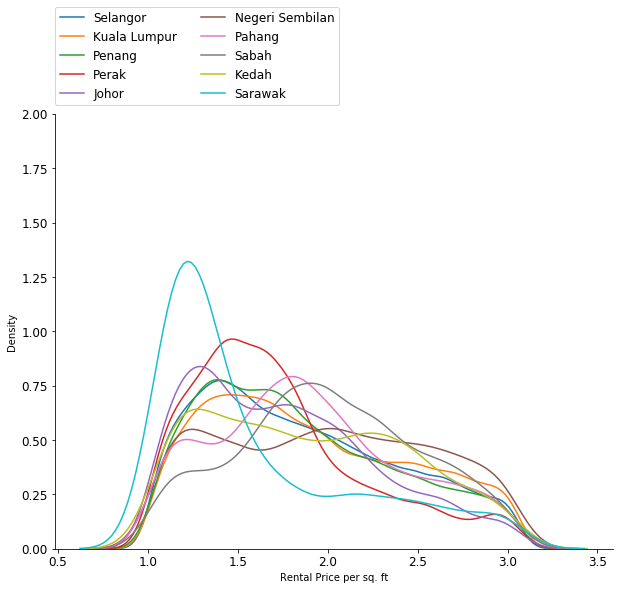

In [18]:
plt.figure(figsize = (10,8))
for i in df2_2016.sort_values('numListings',ascending = False)['State'][:10]:
    g = sns.distplot(df[(df['State'] == i) &
                       (df['year'] == 2016)]['Price_persqft'],hist = False,label = i)
    g.set(ylim = (0, 2))
plt.grid(False)
sns.despine()
plt.legend(bbox_to_anchor=(0., 1.02, 0., .102), loc=3,
           ncol=2, borderaxespad=0.,fontsize = 12)
plt.ylabel('Density')
plt.xlabel('Rental Price per sq. ft')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('../data/processed/distribution_rentalpersqft_byState_sortHousehold_2016_top10.png',bbox_inches = 'tight',
           dpi = 140)

In [47]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sorterDay = dict(zip(range(len(days)),days))
df['dayofWeek'] = pd.to_datetime(df['posting_date']).map(lambda x:x.weekday()).map(sorterDay)

In [107]:
df.groupby(['dayofWeek'])\
.agg({'Price_persqft':np.median,
     'State':'count'})\
.reset_index()\
#.to_excel('../data/excel/rental_pricepersqft_byDay.xlsx')

dayofWeek  Price_persqft  State
0     Friday          1.840  74344
1     Monday          1.807  82353
2   Saturday          1.818  51077
3     Sunday          1.857  43846
4   Thursday          1.820  84411
5    Tuesday          1.818  86574
6  Wednesday          1.824  86065

In [38]:
list1 = [i + '11/2017' for i in [str(i) + '/' for i in range(1,32)]]
list2 = [i + '12/2017' for i in [str(i) + '/' for i in range(1,31)]]

In [40]:
sorterIndex = dict(zip(list1 + list2,
                    range(len(list1 + list2))))

In [41]:
df2 = df[(df['year'] == 2017) & (df['month'].isin([11,12]))]\
.groupby('posting_day')['State'].count().reset_index()

In [55]:
df3 = df2.sort_values('posting_day_rank').copy()
df3['posting_dayofWeek'] = df3['posting_day'].map(lambda x:sorterDay[datetime.strptime(x,'%d/%m/%Y').weekday()])

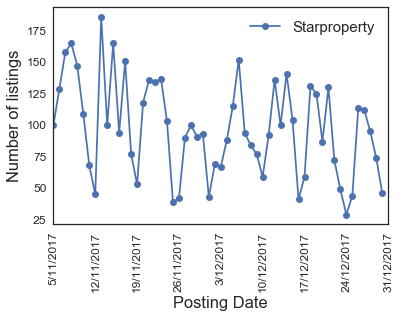

In [101]:
df2['posting_day_rank'] = df2['posting_day'].map(sorterIndex)
plt.figure(figsize = (10,8))
g = df2.sort_values('posting_day_rank')\
[['posting_day','State']]\
.rename(columns = {'State':'Starproperty'}).iloc[4:,:]\
.set_index('posting_day').plot(marker = 'o')
#plt.Axes.set_xticks(ticks = [i for i in range(0,60)])
plt.xticks([i for i in np.arange(0, 60, step = 7)],('5/11/2017','12/11/2017','19/11/2017',
                                                   '26/11/2017','3/12/2017','10/12/2017',
                                                   '17/12/2017','24/12/2017','31/12/2017'),rotation = '90')
plt.ylabel('Number of listings')
plt.xlabel('Posting Date')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.legend('Starproperty')
plt.savefig('../data/processed/numlistings_day.png',bbox_inches = 'tight',
           dpi = 140)

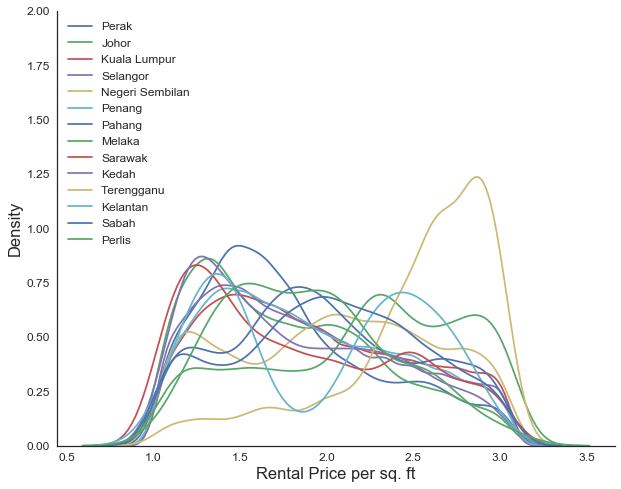

In [17]:
plt.figure(figsize = (10,8))
for i in df['State'].unique():
    g = sns.distplot(df[df['State'] == i]['Price_persqft'],hist = False,label = i)
    g.set(ylim = (0, 2))
plt.grid(False)
sns.despine()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Density')
plt.xlabel('Rental Price per sq. ft')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('../data/processed/distribution_rentalpersqft_byState.png',bbox_inches = 'tight',
           dpi = 140)

# Processing

In [4]:
#remove outliers
def remove_Outlier_box(values):
    firstq,median,thirdq = values.dropna().quantile([0.25,0.5,0.75])
    IQR = thirdq - firstq
    return ~(((values-thirdq)>1.5*IQR) | ((firstq-values)>1.5*IQR))

In [4]:
sizeCat_list = []
def getSizeCat(size):
    for i in size:
        if i<=500:
            sizeCat_list.append('200-500')
        elif i<=800:
            sizeCat_list.append('501-800')
        elif i<=1100:
            sizeCat_list.append('801-1100')
        elif i<=1400:
            sizeCat_list.append('1101-1400')
        elif i<=1700:
            sizeCat_list.append('1401-1700')
        else:
            sizeCat_list.append('more than 1701')
    return sizeCat_list
df['Size_Category'] = getSizeCat(df['size'])

In [3]:
sorterIndex = dict(zip(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701'],
                       range(len(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701']))))

In [16]:
df2 = df.groupby(['Type','Size_Category'])['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
TotalCount_Dict = {'Condominium':sum(df2[df2['Type'] == 'Condominium']['Number_listings']),
                  'House':sum(df2[df2['Type'] == 'House']['Number_listings'])}
def CountPercent(HouseType,NumCount):
    Percent_list = []
    for i,j in enumerate(HouseType):
        Percent_list.append(round((NumCount[i]/TotalCount_Dict[j])*100,1))
    return Percent_list

df2['Percent_Count'] = CountPercent(df2['Type'],df2['Number_listings'])
df2['Size_Category_Rank'] = df2['Size_Category'].map(sorterIndex)
df2\
.sort_values(['Type','Size_Category_Rank'])\
.to_excel('../data/excel/Percent_Count_NumListings_BySizeByType.xlsx')

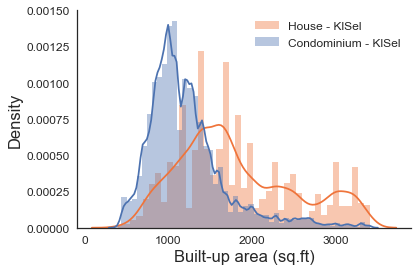

In [14]:
# fig, ax =plt.subplots(111)
plt.figure(figsize = (6,4))
g = sns.distplot(df[(df['State'].isin(['Kuala Lumpur','Selangor'])) &
    (df['Type'] == 'House')]['size'],label = 'House - KlSel', color = '#ef743b')
g.set(ylim = (0, 0.0015))
g = sns.distplot(df[(df['State'].isin(['Kuala Lumpur','Selangor'])) &
    (df['Type'] == 'Condominium')]['size'], label = 'Condominium - KlSel')
g.set(ylim = (0, 0.0015))
plt.grid(False)
sns.despine()
sns.set(font_scale = 1.5)
sns.set_style('white')
plt.xlabel('Built-up area (sq.ft)')
plt.ylabel('Density')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('../data/processed/distribution_housetype_KlSel.png',bbox_inches = 'tight',
           dpi = 140)

In [24]:
df2 = df[df['State'].isin(['Kuala Lumpur','Selangor'])]\
         .groupby(['Type','num_bedroom'])['Property'].count().reset_index()\
        .rename(columns = {'Property':'Number_listings'})
TotalCount_Dict = {'Condominium':sum(df2[df2['Type'] == 'Condominium']['Number_listings']),
                  'House':sum(df2[df2['Type'] == 'House']['Number_listings'])}
def CountPercent(HouseType,NumCount):
    Percent_list = []
    for i,j in enumerate(HouseType):
        Percent_list.append(round((NumCount[i]/TotalCount_Dict[j])*100,1))
    return Percent_list
df2['Percent_Count'] = CountPercent(df2['Type'],df2['Number_listings'])
df2.to_excel('../data/excel/Percent_Count_Numlistings_ByNumBedroomKlSel.xlsx')

In [17]:
df2 = df[df['State'] == 'Kuala Lumpur'].groupby(['Type','Size_Category'])['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
TotalCount_Dict = {'Condominium':sum(df2[df2['Type'] == 'Condominium']['Number_listings']),
                  'House':sum(df2[df2['Type'] == 'House']['Number_listings'])}
def CountPercent(HouseType,NumCount):
    Percent_list = []
    for i,j in enumerate(HouseType):
        Percent_list.append(round((NumCount[i]/TotalCount_Dict[j])*100,1))
    return Percent_list

df2['Percent_Count'] = CountPercent(df2['Type'],df2['Number_listings'])
df2['Size_Category_Rank'] = df2['Size_Category'].map(sorterIndex)
df2\
.sort_values(['Type','Size_Category_Rank'])\
.to_excel('../data/excel/Percent_Count_NumListings_BySizeKL.xlsx')

In [18]:
df2 = df[df['State'] == 'Selangor'].groupby(['Type','Size_Category'])['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
TotalCount_Dict = {'Condominium':sum(df2[df2['Type'] == 'Condominium']['Number_listings']),
                  'House':sum(df2[df2['Type'] == 'House']['Number_listings'])}
def CountPercent(HouseType,NumCount):
    Percent_list = []
    for i,j in enumerate(HouseType):
        Percent_list.append(round((NumCount[i]/TotalCount_Dict[j])*100,1))
    return Percent_list

df2['Percent_Count'] = CountPercent(df2['Type'],df2['Number_listings'])
df2['Size_Category_Rank'] = df2['Size_Category'].map(sorterIndex)
df2\
.sort_values(['Type','Size_Category_Rank'])\
.to_excel('../data/excel/Percent_Count_NumListings_BySizeSel.xlsx')

# Aggregration

# By Region

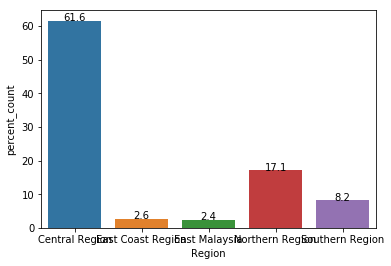

In [8]:
region_dict = {'Northern Region': ['Perlis', 'Kedah', 'Penang', 'Perak'],
'East Coast Region': ['Kelantan', 'Terengganu', 'Pahang'],
'Central Region': ['Selangor', 'Kuala Lumpur'],
'Southern Region': ['Negeri Sembilan', 'Melaka', 'Johor'],
              'East Malaysia':['Sabah','Sarawak','Labuan']}

df['Region'] = df['State'].map(lambda x: ''.join([i if x in j else '' for i,j in region_dict.items()]))


df2 = df.groupby('Region')['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
total_count = df.shape[0]
df2['percent_count'] = round((df2['Number_listings']/total_count)*100,1)
#df2.to_csv("../data/excel/Percent_Count_NumListings_ByRegion.csv",index = False, encoding = 'utf-8')

#Visualization
g = sns.barplot(x = 'Region', y = 'percent_count',data = df2)
g.set_ylabel('percent_count')
h = g.get_figure()
for index, row in df2.iterrows():
    g.text(index,row.percent_count, round(row.percent_count,2), color='black', ha="center")
#g.set_xticklabels(df2['Region'],rotation = 90)
#h.savefig('../data/excel/Percent_Count_NumListings_ByRegion.png',bbox_inches = 'tight')

# By State

[Text(0,0,'Johor'),
 Text(0,0,'Kedah'),
 Text(0,0,'Kelantan'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Melaka'),
 Text(0,0,'Negeri Sembilan'),
 Text(0,0,'Pahang'),
 Text(0,0,'Penang'),
 Text(0,0,'Perak'),
 Text(0,0,'Perlis'),
 Text(0,0,'Sabah'),
 Text(0,0,'Sarawak'),
 Text(0,0,'Selangor'),
 Text(0,0,'Terengganu')]

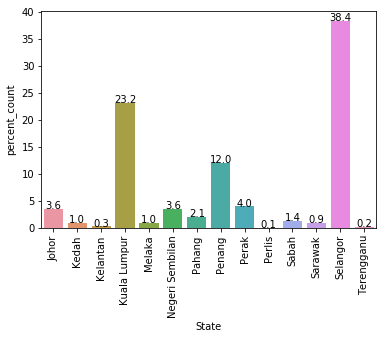

In [9]:
#listing count by state
total_count = df.shape[0]
df2 = df.groupby('State')['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
df2['percent_count'] = round((df2['Number_listings']/total_count)*100,1)
#df2.to_csv("../data/excel/Percent_Count_NumListings_ByState.csv",index = False, encoding = 'utf-8')

g = sns.barplot(x = 'State', y = 'percent_count',data = df2)
g.set_ylabel('percent_count')
h = g.get_figure()
for index, row in df2.iterrows():
    g.text(index,row.percent_count, round(row.percent_count,2), color='black', ha="center")
g.set_xticklabels(df2['State'],rotation = 90)
#h.savefig('../data/excel/Percent_Count_NumListings_ByState.png',bbox_inches = 'tight')

# By House Type

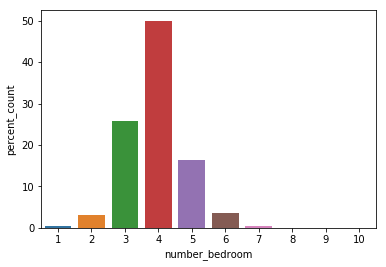

In [10]:
#count of number bedroom by house
total_count = df[df['Type'] == 'House'].shape[0]
df2 = df[df['Type'] == 'House']['num_bedroom'].value_counts().reset_index()\
.rename(columns = {'index':'number_bedroom','num_bedroom':'count'})
df2['percent_count'] = round((df2['count']/total_count)*100,1)
#df2.to_csv("../data/excel/Percent_Count_NumBedroom_House.csv",index = False, encoding = 'utf-8')

#visualization
g = sns.barplot(x = 'number_bedroom', y = 'percent_count',data = df2)
g.set_ylabel('percent_count')
h = g.get_figure()
#for index, row in df2.iterrows():
#    g.text(index,row.percent_count, round(row.percent_count,2), color='black', ha="center")
#h.savefig('../data/excel/Percent_Count_NumBedroom_House.png',bbox_inches = 'tight')

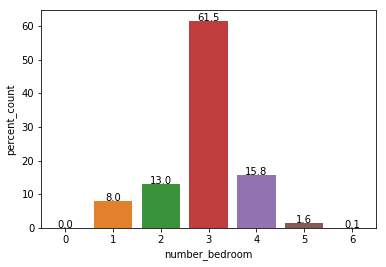

In [11]:
#count of number bedroom by condo
total_count = df[df['Type'] == 'Condominium'].shape[0]
df2 = df[df['Type'] == 'Condominium']['num_bedroom'].value_counts().reset_index()\
.rename(columns = {'index':'number_bedroom','num_bedroom':'count'})
df2['percent_count'] = round((df2['count']/total_count)*100,1)
#df2.to_csv("../data/excel/Percent_Count_NumBedroom_Condominium.csv",index = False, encoding = 'utf-8')

g = sns.barplot(x = 'number_bedroom', y = 'percent_count',data = df2)
g.set_ylabel('percent_count')
h = g.get_figure()
for index, row in df2.iterrows():
    g.text(row.number_bedroom,row.percent_count, round(row.percent_count,2), color='black', ha="center")
#h.savefig('../data/excel/Percent_Count_NumBedroom_Condominium.png',bbox_inches = 'tight')

In [42]:
#to get size categories
df2 = df[remove_Outlier_box(df['size'])].copy()
df2['size'].describe()

sizeCat_list = []
def getSizeCat(size):
    for i in size:
        if i<=500:
            sizeCat_list.append('200-500')
        elif i<=800:
            sizeCat_list.append('501-800')
        elif i<=1100:
            sizeCat_list.append('801-1100')
        elif i<=1400:
            sizeCat_list.append('1101-1400')
        elif i<=1700:
            sizeCat_list.append('1401-1700')
        else:
            sizeCat_list.append('more than 1701')
    return sizeCat_list
df2['Size_Category'] = getSizeCat(df2['size'])

sorterIndex = dict(zip(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701'],
                       range(len(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701']))))
df2['Size_Category2'] = df2['Size_Category'].map(sorterIndex)


df3 = df2.groupby(['Type','Size_Category'])['Property'].count().reset_index()\
.rename(columns = {'Property':'Number_listings'})
TotalCount_Dict = {'Condominium':sum(df3[df3['Type'] == 'Condominium']['Number_listings']),
                  'House':sum(df3[df3['Type'] == 'House']['Number_listings'])}

def CountPercent(HouseType,NumCount):
    Percent_list = []
    for i,j in enumerate(HouseType):
        Percent_list.append(round((NumCount[i]/TotalCount_Dict[j])*100,1))
    return Percent_list

df3['Percent_Count'] = CountPercent(df3['Type'],df3['Number_listings'])

sorterIndex = dict(zip(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701'],
                       range(len(['200-500','501-800','801-1100',
                        '1101-1400','1401-1700','more than 1701']))))
df3['Size_Category2'] = df3['Size_Category'].map(sorterIndex)


#df3[['Type','Size_Category','Size_Category2','Percent_Count']]\
#.sort_values(['Type','Size_Category2'])\

#df2[['Type','Size_Category','Size_Category2','Percent_Count']]\
#.sort_values(['Type','Size_Category2'])\
#.to_excel('../data/excel/Percent_Count_NumListings_BySizeByHouse.xlsx')

#visualization
df_sorted = df3.sort_values('Size_Category2')
g = sns.barplot(x = 'Size_Category', y = 'Percent_Count',data = df_sorted)
g.set_ylabel('percent_count')
h = g.get_figure()
#for index, row in df_sorted.iterrows():
#    g.text(row.Size_Category2,row.Percent_Count, round(row.Percent_Count,2), color='black', ha="center")
#g.set_xticklabels(df2['Size_Category'],rotation = 90)
#h.savefig('../data/excel/Percent_Count_NumListings_BySize.png',bbox_inches = 'tight')
#df2.sort_values('Size_Category2').to_excel('../data/excel/NumberListings_BySizeByType.xlsx')

# By State, Year-Month

In [21]:
#average of rental price - KL
df2 = df[(df['State'] == 'Kuala Lumpur')].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_csv('../data/excel/average_rental_price-KL.csv', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,456.221
1    2013-02                2,511.756
2    2013-03                2,468.291
3    2013-04                2,541.829
4    2013-05                2,585.381

In [22]:
#average of rental price - Selangor
df2 = df[(df['State'] == 'Selangor')].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_csv('../data/excel/average_rental_price-Selangor.csv', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,394.092
1    2013-02                2,529.075
2    2013-03                2,421.707
3    2013-04                2,416.601
4    2013-05                2,401.240

# By House Type, Year-Month

In [23]:
#average of rental price - condo,year-quarter
df2 = df[df['Type'] == 'Condominium'].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_excel('../data/excel/average_rental_price-Condominium.xlsx', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,400.377
1    2013-02                2,505.538
2    2013-03                2,415.284
3    2013-04                2,416.840
4    2013-05                2,453.142

In [24]:
#average of rental price - house,year-quarter 
df2 = df[df['Type'] == 'House'].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
df2.to_excel('../data/excel/average_rental_price-House.xlsx', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,482.247
1    2013-02                2,682.759
2    2013-03                2,497.037
3    2013-04                2,747.913
4    2013-05                2,681.394

In [25]:
#average of rental price - condo kl and selangor
df2 = df[(df['State'] == 'Kuala Lumpur')&
        (df['Type'] == 'Condominium')].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_excel('../data/excel/average_rental_price-Condominium_KL.xlsx')
df2.head()

year_month  average of rental price
0    2013-01                2,434.663
1    2013-02                2,515.998
2    2013-03                2,461.977
3    2013-04                2,528.276
4    2013-05                2,567.784

In [26]:
df2 = df[(df['State'] == 'Selangor')&
        (df['Type'] == 'Condominium')].groupby(['year_month'])\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_excel('../data/excel/average_rental_price-Condominium_Sel.xlsx')
df2.head()

year_month  average of rental price
0    2013-01                2,387.496
1    2013-02                2,504.350
2    2013-03                2,424.991
3    2013-04                2,371.648
4    2013-05                2,375.338

In [27]:
#average of rental price - condo without kl and selangor
df2 = df[(df['State'].map(lambda x:x not in ['Selangor','Kuala Lumpur']))
   & (df['Type'] == 'Condominium')].groupby('year_month')\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_csv('../data/excel/average_rental_price-Condominium_noKlSelangor.csv', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,388.160
1    2013-02                2,498.693
2    2013-03                2,360.748
3    2013-04                2,384.258
4    2013-05                2,470.173

In [28]:
#average of rental price - house without kl and selangor
df2 = df[(df['State'].map(lambda x:x not in ['Selangor','Kuala Lumpur']))
   & (df['Type'] == 'House')].groupby('year_month')\
.agg({'price':'mean'}).reset_index().rename(columns = {'price':'average of rental price'})
#df2.to_csv('../data/excel/average_rental_price-House_noKlSelangor.csv', index = False, encoding = 'utf-8')
df2.head()

year_month  average of rental price
0    2013-01                2,210.556
1    2013-02                2,550.000
2    2013-03                2,651.064
3    2013-04                2,373.714
4    2013-05                2,331.416

# By House Type, Year - KL, Selangor

In [29]:
#median price for condo in kl and selangor
df[(df['State'] == 'Kuala Lumpur') & 
    (df['Type'] == 'Condominium')].groupby('year')\
.agg({'price':'median'}).reset_index().rename(columns = {'price':'KL condo median price'})\
.merge(df[(df['State'] == 'Selangor') & 
        (df['Type'] == 'Condominium')].groupby('year')\
.agg({'price':'median'}).reset_index().rename(columns = {'price':'Selangor condo median price'}),
      on = 'year',how = 'left').head()
#.to_csv('../data/processed/Kl_Selangor_condoMedianPrice-01-03-18.csv')

year  KL condo median price  Selangor condo median price
0  2013              2,000.000                    2,000.000
1  2014              2,100.000                    2,200.000
2  2015              2,000.000                    2,000.000
3  2016              1,900.000                    1,900.000
4  2017              1,800.000                    1,800.000

In [30]:
#median price for house in kl and selangor
df[(df['State'] == 'Kuala Lumpur') & 
    (df['Type'] == 'House')].groupby('year')\
.agg({'price':'median'}).reset_index().rename(columns = {'price':'KL house median price'})\
.merge(df[(df['State'] == 'Selangor') & 
    (df['Type'] == 'House')].groupby('year')\
.agg({'price':'median'}).reset_index().rename(columns = {'price':'Selangor house median price'}),
      on = 'year',how = 'left').head()
#.to_csv('../data/processed/Kl_Selangor_houseMedianPrice-01-03-18.csv')

year  KL house median price  Selangor house median price
0  2013              2,500.000                    2,300.000
1  2014              2,400.000                    2,200.000
2  2015              2,300.000                    2,200.000
3  2016              2,350.000                    2,000.000
4  2017              2,400.000                    2,000.000

# Price Index

# CPI weightage

In [4]:
CPI_weightage = pd.read_excel('../data/external/CPI weightage.xlsx')
CPI_weightage

ITEM CODE                       Item Desc     KL PUTRAJAYA SELANGOR  \
0        nan                             NaN  URBAN     URBAN    URBAN   
1 41,101.000  BUNGALOW * * * * * * * * * * *    199         1      556   
2 41,102.000  SEMI-DETACHED  * * * * * * * *     19        20      337   
3 41,103.000  TERRACE, TOWNHOUSE * * * * * *    787        42     2812   
4 41,105.000  FLATS/SHOP HOUSES  * * * * * *    303        10      562   
5 41,106.000  APARTMENT/CONDOMINIUM  * * * *   1379        84     1246   
6        nan                             NaN    NaN       NaN      NaN   
7    411.000  ACTUAL RENTAL PD BY TENANTS* *   2687       157     5513   

  Unnamed: 5  JOHOR Unnamed: 7 MELAKA Unnamed: 9 NEGERI SEMBILAN Unnamed: 11  \
0      RURAL  URBAN      RURAL  URBAN      RURAL           URBAN       RURAL   
1        119    319        191    101         12              44          55   
2         21    123         19     12          0              18           9   
3         58   1005        105    181          9             267          28   
4          6    156          9     18          1              15           2   
5         12    135          1     42          0              10           0   
6        NaN    NaN        NaN    NaN        NaN             NaN         NaN   
7        216   1738        325    354         22             354          94   

  PERLIS Unnamed: 13 PENANG Unnamed: 15  PERAK Unnamed: 17  KEDAH Unnamed: 19  \
0  URBAN       RURAL  URBAN       RURAL  URBAN       RURAL  URBAN       RURAL   
1     23          24    245          22    203          96    112         131   
2      6           1     83           2     35          13     86           9   
3     23           5    366           8    496          33    242          14   
4      5           1    218           4     11           4     14           3   
5      0           0    272           0     21           0      4           0   
6    NaN         NaN    NaN         NaN    NaN         NaN    NaN         NaN   
7     57          31   1184          36    766         146    458         157   

     PHG Unnamed: 21  T'GNU Unnamed: 23  K'TAN Unnamed: 25 SARAWAK  \
0  URBAN       RURAL  URBAN       RURAL  URBAN       RURAL   URBAN   
1     83         130    173          97    139         136     195   
2     38          11     21           3     15           6     124   
3    223          36     49           5     46          11     429   
4     21           8     11           1      7           6      48   
5     13           0      8           0      4           0      19   
6    NaN         NaN    NaN         NaN    NaN         NaN     NaN   
7    378         185    262         106    211         159     815   

  Unnamed: 27  SABAH Unnamed: 29 LABUAN Unnamed: 31   MALAYSIA  
0       RURAL  URBAN       RURAL  URBAN       RURAL        nan  
1         177    363         281     31           7  4,265.000  
2          16     57          44      3           0  1,151.000  
3         102    295          58     18           1  7,754.000  
4          12     77           9     12           0  1,554.000  
5           0    131           1      0           0  3,382.000  
6         NaN    NaN         NaN    NaN         NaN        nan  
7         307    923         393     64           8 18,106.000

In [5]:
#Putrajaya belongs to selangor,labuan belongs to sabah
stateWeight_dict = {'Kuala Lumpur':2687/18106,'Selangor':5886/18106, 'Johor':2063/18106,'Penang':1220/18106,
                   'Negeri Sembilan':448/18106,'Perak':912/18106,'Melaka':376/18106,'Kedah':615/18106,
                   'Pahang':563/18106,'Terengganu':368/18106,'Kelantan':370/18106,'Perlis':88/18106,
                   'Sabah':1388/18106,'Sarawak':1122/18106}

In [29]:
## flats and apartments/condominium - condo
#others - house
houseTypeWeight_dict = {'Kuala Lumpur':{'Condominium':1682/2687,'House':1005/2687},
                        'Selangor':{'Condominium':1920/5886,'House':3966/5886},
                        'Johor':{'Condominium':301/2063,'House':1762/2063},
                        'Penang':{'Condominium':494/1220,'House':726/1220},
                   'Negeri Sembilan':{'Condominium':27/448,'House':421/448},
                        'Perak':{'Condominium':36/912,'House':876/912},
                        'Melaka':{'Condominium':61/376,'House':315/376},'Kedah':{'Condominium':21/615,'House':594/615},
                   'Pahang':{'Condominium':42/563,'House':521/563},'Terengganu':{'Condominium':20/368,'House':348/368},
                        'Kelantan':{'Condominium':17/370,'House':353/370},'Perlis':{'Condominium':6/88,'House':82/88},
                   'Sabah':{'Condominium':218/1388,'House':1170/1388},'Sarawak':{'Condominium':79/1122,'House':1043/1122}}

In [9]:
##Computation of Rental Price Index
df2 = df.copy()

#Total of posting based on state and year
df_grouped = df2[['Location_property','State','year']].groupby(['State','year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year
df_grouped2 = df2[['Location_property','year']].groupby(['year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year
df_grouped3_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped3_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#get base values
BaseYear_dict = {i[0]:i[2] for i in df_grouped4_average.values if i[1] == 2013}

BaseYear_dict['Perlis'] = 1787.626

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [15]:
df_grouped3_average.iloc[45:48,2] = 1787.626

In [16]:
for state in df2['State'].unique():
    print("HPI_" + re.sub(" ","",state))
    try:
        exec('HPI_{} = [(i[0],i[1],(i[2]/BaseYear_dict["{}"])*'.format(re.sub(" ","",state),state) +
         '100*stateWeight_dict["{}"])'.format(state) +
         ' for i in df_grouped3_average.values if i[0] == "{}"]'.format(state))
    except:
        print(state + ' does not have data in 2013')
        #impute missing values with forward-fill

HPI_Perak
HPI_Johor
HPI_KualaLumpur
HPI_Selangor
HPI_NegeriSembilan
HPI_Penang
HPI_Pahang
HPI_Melaka
HPI_Sarawak
HPI_Kedah
HPI_Terengganu
HPI_Kelantan
HPI_Sabah
HPI_Perlis


In [18]:
HPI_list = []
for year in range(2013,2018):
    info_list = []
    for state in df2['State'].unique():
        eval("info_list.append([i[2] for i in HPI_{} if i[1]=={}][0])".format(re.sub(" ","",state),year))
    HPI_list.append((year,sum(info_list)))
HPI_list

[(2013, 100.00000000000001),
 (2014, 98.06360958259368),
 (2015, 95.21172934309328),
 (2016, 87.48069706824366),
 (2017, 84.09188540453758)]

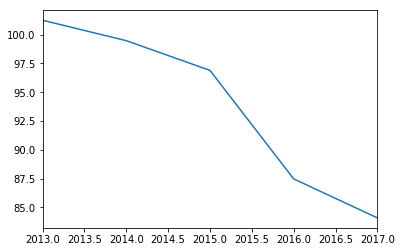

In [56]:
pd.Series([i[1] for i in HPI_list],index = [i[0] for i in HPI_list]).plot(kind = 'line')

In [19]:
pd.Series([i[1] for i in HPI_list],index = [i[0] for i in HPI_list])\
.to_excel("../data/excel/RentalPriceIndex_star_byState.xlsx")

In [49]:
##Computation of Rental Price Index
df2 = df.copy()

#Total of posting based on state and year
df_grouped = df2[['Location_property','State','Type','year']].groupby(['State','Type','year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year
df_grouped2 = df2[['Location_property','year']].groupby(['year'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and year
df_grouped3_average = df2[['year','State','Type','price']].groupby(['State','Type','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped3_median = df2[['year','State','Type','price']].groupby(['State','Type','year'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','Type','price']].groupby(['State','Type','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','Type','price']].groupby(['State','Type','year'])\
.agg({'price':'median'}).reset_index()

#get base values
BaseYear_dict = {(i[0],i[1]):i[3] for i in df_grouped4_average.values if i[2] == 2013}

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [50]:
BaseYear_dict.update({('Kelantan','House'):3450})

BaseYear_dict.update({('Perlis','Condominium'):1785.783})

BaseYear_dict[('Perlis','House')] = 2000

In [51]:
additional_table = pd.DataFrame({'State':['Kelantan','Perlis'],
                               'Type':['House','Condominium'],
                               'year':[2013,2013],
                              'price':[3450,1785.783]})
additional_table

State         Type     price  year
0  Kelantan        House 3,450.000  2013
1    Perlis  Condominium 1,785.783  2013

In [52]:
df_grouped4_average = pd.concat([df_grouped4_average,additional_table]).sort_values(['State','Type','year'])\
                    [['State','Type','year','price']]

df_grouped4_average.iloc[94,3] = 2000

In [57]:
for state in [i for i in df2['State'].unique()]:
    print("HPI_" + re.sub(" ","",state))
    exec('HPI_{}_temp = [(i[0],i[1],i[2],(i[3]/BaseYear_dict[("{}",i[1])]'.format(re.sub(" ","",state),state)+
    '*100*(houseTypeWeight_dict["{}"][i[1]])))'.format(state)+
       'for i in df_grouped4_average.values if i[0] == "{}"]'.format(state))
    exec('HPI_{} = [("{}",i,sum([j[3] for j in HPI_{}_temp if j[2] == i])*'.format(re.sub(" ","",state),state,re.sub(" ","",state))+
       'stateWeight_dict["{}"]) for i in range(2013,2018)]'.format(state))

HPI_Perak
HPI_Johor
HPI_KualaLumpur
HPI_Selangor
HPI_NegeriSembilan
HPI_Penang
HPI_Pahang
HPI_Melaka
HPI_Sarawak
HPI_Kedah
HPI_Terengganu
HPI_Kelantan
HPI_Sabah
HPI_Perlis


In [58]:
HPI_Perlis

[('Perlis', 2013, 0.48602673147023073),
 ('Perlis', 2014, 1.5851099083176845),
 ('Perlis', 2015, 0.14845336185463362),
 ('Perlis', 2016, 0.4860258922963659),
 ('Perlis', 2017, 0.39408285175283875)]

In [59]:
HPI_list = []
for year in range(2013,2018):
    info_list = []
    for state in df2['State'].unique():
        eval("info_list.append([i[2] for i in HPI_{} if i[1]=={}][0])".format(re.sub(" ","",state),year))
    HPI_list.append((year,sum(info_list)))
HPI_list

[(2013, 100.00000000000001),
 (2014, 103.0063876321895),
 (2015, 98.75962020475497),
 (2016, 94.06379870666638),
 (2017, 89.02190341447287)]

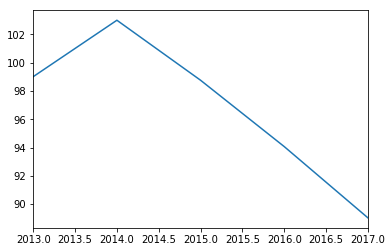

In [72]:
pd.Series([i[1] for i in HPI_list],index = [i[0] for i in HPI_list]).plot(kind = 'line')

In [60]:
pd.Series([i[1] for i in HPI_list],index = [i[0] for i in HPI_list])\
.to_excel("../data/excel/RentalPriceIndex_star_byStateHousetype.xlsx")

# By House Type - House

In [31]:
df2 = df[df['Type'] == 'House'].copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Location_property','State','year-quarter']].groupby(['State','year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Location_property','year-quarter']].groupby(['year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and quarter
df_grouped3_average = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

#price index for other states - house
df2 = df[(df['Type'] == 'House') & (df['State'].map(lambda x:x not in ['Kuala Lumpur','Selangor']))].copy()

base_price = np.mean(df2[df2['year'] == 2013]['price'])
df_grouped = df2[['year-quarter','price']].groupby('year-quarter')\
.agg({'price':'mean'}).reset_index()
df_grouped['price_index'] = (df_grouped['price']/base_price)*100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [32]:
state_list = ['Kuala Lumpur','Perak','Selangor','Pahang',
             'Kedah','Penang','Johor','Sarawak',
             'Melaka','Sabah','Negeri Sembilan']
#smart way
for i in state_list:
    print('HPI_{}_house_avg'.format(re.sub(' ','',i)))
    exec('HPI_{}_house_avg = [(i[0],i[1],(i[2]/[i[2] for i in base_array_average'.format(re.sub(' ','',i)) +
    ' if i[0] == "{}"][0])*100)'.format(i) + ' for i in df_grouped3_average.values if i[0] == "{}"]'.format(i))

HPI_KualaLumpur_house_avg
HPI_Perak_house_avg
HPI_Selangor_house_avg
HPI_Pahang_house_avg
HPI_Kedah_house_avg
HPI_Penang_house_avg
HPI_Johor_house_avg
HPI_Sarawak_house_avg
HPI_Melaka_house_avg
HPI_Sabah_house_avg
HPI_NegeriSembilan_house_avg


In [33]:
panda_dict = {}
for i in state_list:
    exec('panda_dict["{}"] = pd.Series([i[2] for i in HPI_{}_house_avg])'.format(i,re.sub(' ','',i)))

#form pandas df for star
Starhouse_df = pd.DataFrame(panda_dict)
Starhouse_df['Source'] = 'Star'
Starhouse_df.index = df_grouped3_average['year-quarter'].unique()

In [34]:
Starhouse_df.head()

Johor   Kedah  Kuala Lumpur  Melaka  Negeri Sembilan  Pahang  Penang  \
2013-1 107.273 100.000        95.191 127.575           74.178  85.809  88.991   
2013-2  99.072 150.000        99.625  66.033          107.663 121.287  91.209   
2013-3  95.801 223.438       100.263  97.464           97.147  84.983 120.756   
2013-4 100.884 186.905       102.506 108.734          105.687  86.609  97.666   
2014-1 117.373 205.833        98.705 115.797           89.722 145.545  89.364   

         Perak   Sabah  Sarawak  Selangor Source  
2013-1 109.108 115.640  100.000    95.815   Star  
2013-2  88.650  64.455   85.000   104.945   Star  
2013-3 107.680 122.591  159.318    99.803   Star  
2013-4 101.831  68.246  136.667    97.998   Star  
2014-1  90.765  51.817   98.333    97.277   Star

# By House Type - Condo

In [35]:
df2 = df[df['Type'] == 'Condominium'].copy()

#Total of posting based on state and year-quarter
df_grouped = df2[['Location_property','State','year-quarter']].groupby(['State','year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped.columns=[j if j else i for i,j in df_grouped.columns.values]

#total of posting based on year-quarter
df_grouped2 = df2[['Location_property','year-quarter']].groupby(['year-quarter'])\
.agg({'Location_property':{'Total of listings':'count'}}).reset_index()
df_grouped2.columns=[j if j else i for i,j in df_grouped2.columns.values]

#average of sales price based on state and quarter
df_grouped3_average = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year-quarter
df_grouped3_median = df2[['year-quarter','State','price']].groupby(['State','year-quarter'])\
.agg({'price':'median'}).reset_index()

#average of sales price based on state and year
df_grouped4_average = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'mean'}).reset_index()

#median of sales price based on state and year
df_grouped4_median = df2[['year','State','price']].groupby(['State','year'])\
.agg({'price':'median'}).reset_index()

#get base values
base_array_average = [i for i in df_grouped4_average.values if i[1] == 2013]
base_array_median = [i for i in df_grouped4_median.values if i[1] == 2013]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [36]:
#price index for other states - house
df2 = df[(df['Type'] == 'Condominium') & (df['State'].map(lambda x:x not in ['Kuala Lumpur','Selangor']))].copy()

base_price = np.mean(df2[df2['year'] == 2013]['price'])
df_grouped = df2[['year-quarter','price']].groupby('year-quarter')\
.agg({'price':'mean'}).reset_index()
df_grouped['price_index'] = (df_grouped['price']/base_price)*100

In [37]:
state_list = ['Kuala Lumpur','Perak','Selangor','Pahang',
             'Kedah','Penang','Johor','Sarawak',
             'Melaka','Sabah','Negeri Sembilan']
#smart way
for i in state_list:
    print('HPI_{}_condo_avg'.format(re.sub(' ','',i)))
    exec('HPI_{}_condo_avg = [(i[0],i[1],(i[2]/[i[2] for i in base_array_average'.format(re.sub(' ','',i)) +
    ' if i[0] == "{}"][0])*100)'.format(i) + ' for i in df_grouped3_average.values if i[0] == "{}"]'.format(i))

HPI_KualaLumpur_condo_avg
HPI_Perak_condo_avg
HPI_Selangor_condo_avg
HPI_Pahang_condo_avg
HPI_Kedah_condo_avg
HPI_Penang_condo_avg
HPI_Johor_condo_avg
HPI_Sarawak_condo_avg
HPI_Melaka_condo_avg
HPI_Sabah_condo_avg
HPI_NegeriSembilan_condo_avg


In [38]:
panda_dict = {}
for i in state_list:
    exec('panda_dict["{}"] = pd.Series([i[2] for i in HPI_{}_condo_avg])'.format(i,re.sub(' ','',i)))

#form pandas df for star
Starcondo_df = pd.DataFrame(panda_dict)
Starcondo_df['Source'] = 'Star'
Starcondo_df.index = df_grouped3_average['year-quarter'].unique()

In [39]:
Starcondo_df.head()

Johor   Kedah  Kuala Lumpur  Melaka  Negeri Sembilan  Pahang  Penang  \
2013-1 105.208  97.034        93.767  90.917           98.693  91.194  97.426   
2013-2 101.379 100.931        97.861  94.609          100.224  93.634  98.961   
2013-3  96.682  99.715       103.224 104.725          104.987  97.439 101.870   
2013-4  99.297 100.106       101.924 102.511           96.155 110.373 100.199   
2014-1 101.041  98.283       100.070 112.454           93.237  96.442 102.374   

         Perak   Sabah  Sarawak  Selangor Source  
2013-1 103.768 102.172  104.453    98.485   Star  
2013-2  99.828 102.908  100.329    98.066   Star  
2013-3 100.251 102.528  105.868   103.559   Star  
2013-4  98.610  96.437   95.460    99.292   Star  
2014-1  95.346  88.184   90.677   100.257   Star

In [ ]:
Starcondo_df.to_excel('../data/excel/RentalPriceIndex_Condo.xlsx')

# Comparison with Edge Property - House

In [ ]:
df_excel = pd.read_excel('../data/external/Edge Prices.xlsx',sheetname = 'Rental')

edge_index = sorted([i for i in df['year-quarter'].unique() if i not in ['2017-3','2017-4']])

#from edge property
#rental price - house
#take average of 1storey and 2 storey as house rental price for Bandar Seri Damansara, TTDI, Bangsar,Puchong
#starting from 2013Q1 till 2017Q2
House_BandarSriDamansara_Rental = pd.Series(np.mean([[i for i in df_excel.iloc[17,33:].values if str(i)!='nan'],
                            [i for i in df_excel.iloc[5,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_TTDI_Rental = pd.Series(np.mean([[i for i in df_excel.iloc[7,33:].values if str(i)!='nan'],
                            [i for i in df_excel.iloc[19,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_Bangsar_Rental = pd.Series(np.mean([[i for i in df_excel.iloc[9,33:].values if str(i)!='nan'],
                            [i for i in df_excel.iloc[21,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_Puchong_Rental = pd.Series(np.mean([[i for i in df_excel.iloc[12,33:].values if str(i)!='nan'],
                            [i for i in df_excel.iloc[27,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_BandarUtama_Rental = pd.Series([i for i in df_excel.iloc[21,33:].values if str(i)!='nan'],index = edge_index)
House_USJ_Rental = pd.Series([i for i in df_excel.iloc[25,33:].values if str(i)!='nan'],index = edge_index)

In [ ]:
#get house listings from propwall
pattern = re.compile('Bandar Sri Damansara|TTDI|Bandar Utama|Bangsar|USJ|Puchong',re.I)

df_house = df[(df['Location_property'].map(lambda x:True if re.search(pattern,x) else False))
             & (df['Type'] == 'House')].copy()

df_house['Area'] = df_house['Location_property'].map(lambda x:re.search(pattern,x).group(0))

df_house_area = df_house[['Area','year-quarter','price']].groupby(['Area','year-quarter'])\
.agg({'price':'mean'}).reset_index().copy()
df_house_area['Source'] = 'Star'

#visualize average price of house based on area
sns.set(font_scale=1.5)
g = sns.factorplot(x="year-quarter", y="price",hue="Area", data=df_house_area, 
               capsize=.2, palette="muted", size=10, aspect=.75)
g.fig.set_size_inches(20,6)
g.set_ylabels('Average Price of House')
g.set_xticklabels(rotation = 60)

In [ ]:
panda_list = []
#plot graphs to compare average price between Propwall and Edge
for i in 'Bandar Sri Damansara|TTDI|Bandar Utama|Bangsar|USJ|Puchong'.split('|'):
    df_temp = df_house_area[df_house_area['Area'] == i].copy()
    exec('df_Edge = pd.DataFrame(House_{}_Rental)'.format(re.sub(' ','',i)))
    df_Edge.columns = ['price']
    df_Edge['Source'] = 'Edge'
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_Edge = df_Edge.ix[list(same_period)].reset_index()
    df_Edge.rename(columns = {'index':'year-quarter'},inplace = True)
    df_merged = pd.concat([df_temp[df_temp['year-quarter'].map(lambda x:x in same_period)]
                            ,df_Edge]).sort_values('year-quarter')
    panda_list.append(df_merged)
    sns.set(font_scale=1.5)
    g = sns.factorplot(x="year-quarter", y="price",hue="Source", data=df_merged, 
                   capsize=.2, palette="muted", size=6, aspect=.75)
    g.fig.set_size_inches(20,6)
    g.set_ylabels('Average Price ' + i)
    g.set_xticklabels(rotation = 60)
    #g.set_titles('Comparison of Sales HPI')
    g.despine(left=True)
    #g.savefig('../graphs/Comparison_rentalEdge_{}_houseavg.png'.format(i),bbox_inches = 'tight')

pd.concat(panda_list).fillna(method = 'ffill').rename(columns = {'price':'average price'})\
.to_csv("../data/excel/ComparisonHouse_RentalAveragePrice_Edge.csv", index = False, encoding = 'utf-8')

In [ ]:
panda_list = []
#plot graphs to compare price index between Propwall and Edge
for i in 'Bandar Sri Damansara|TTDI|Bandar Utama|Bangsar|USJ|Puchong'.split('|'):
    df_temp = df_house_area[df_house_area['Area'] == i].copy()
    exec('df_Edge = pd.DataFrame(House_{}_Rental)'.format(re.sub(' ','',i)))
    df_Edge.columns = ['price']
    df_Edge['Source'] = 'Edge'
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_Edge = df_Edge.ix[list(same_period)].reset_index()
    df_Edge.rename(columns = {'index':'year-quarter'},inplace = True)
    df_merged = pd.concat([df_temp[df_temp['year-quarter'].map(lambda x:x in same_period)]
                            ,df_Edge]).sort_values(['year-quarter','Source'])
    base_price_Edge = df_merged.iloc[0,2]
    base_price_Star = df_merged.iloc[1,2]
    def getPriceIndex(source_array,price_array):
        return [(price_array[i]/base_price_Edge)*100 if j == 'Edge' else (price_array[i]/base_price_Star)*100 
         for i,j in enumerate(source_array)]
    df_merged['price_index'] = getPriceIndex(list(df_merged['Source']),list(df_merged['price']))
    panda_list.append(df_merged)
    sns.set(font_scale=1.5)
    g = sns.factorplot(x="year-quarter", y="price_index",hue="Source", data=df_merged, 
                   capsize=.2, palette="muted", size=6, aspect=.75)
    g.fig.set_size_inches(20,6)
    g.set_ylabels('Price_Index ' + i)
    g.set_xticklabels(rotation = 60)
    #g.set_titles('Comparison of Sales HPI')
    g.despine(left=True)
    #g.savefig('../graphs/Comparison_rentalEdge_{}_HousePriceIndex.png'.format(i),bbox_inches = 'tight')
    
pd.concat(panda_list).fillna(method = 'bfill').rename(columns = {'price':'average price'})\
.to_csv("../data/excel/ComparisonHouse_RentalPriceIndex_Edge.csv", index = False, encoding = 'utf-8')

In [ ]:
#Get YoY from edge
df_excel2 = pd.read_excel('../data/external/Edge Prices.xlsx',sheetname = 'Rental (yoy)')

House_BandarSriDamansara_YoYRental = pd.Series(np.mean([[i for i in df_excel2.iloc[17,33:].values if str(i)!='nan'],
                            [i for i in df_excel2.iloc[5,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_TTDI_YoYRental = pd.Series(np.mean([[i for i in df_excel2.iloc[7,33:].values if str(i)!='nan'],
                            [i for i in df_excel2.iloc[19,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_Bangsar_YoYRental = pd.Series(np.mean([[i for i in df_excel2.iloc[9,33:].values if str(i)!='nan'],
                            [i for i in df_excel2.iloc[21,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_Puchong_YoYRental = pd.Series(np.mean([[i for i in df_excel2.iloc[12,33:].values if str(i)!='nan'],
                            [i for i in df_excel2.iloc[27,33:].values if str(i)!='nan']],axis = 0),index = edge_index)
House_BandarUtama_YoYRental = pd.Series([i for i in df_excel2.iloc[21,33:].values if str(i)!='nan'],index = edge_index)
House_USJ_YoYRental = pd.Series([i for i in df_excel2.iloc[25,33:].values if str(i)!='nan'],index = edge_index)

In [ ]:
for i in zip(['2016-1','2016-2','2016-2','2016-2','2016-2'],
                 [4,4,4,4,4],
                 ['USJ','Bandar Sri Damansara','Bandar Utama','Bangsar','Puchong']):    
    df_temp = df_house_area[df_house_area['Area'] == i[2]].copy()
    exec('df_Edge = pd.DataFrame(House_{}_YoYRental)'.format(re.sub(' ','',state)))
    df_Edge.columns = ['YoY']
    df_Edge['Source'] = 'Edge'
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_Edge = df_Edge.ix[list(same_period)].reset_index()
    df_Edge.rename(columns = {'index':'year-quarter'},inplace = True)
    df_yoy = df_temp[df_temp['year-quarter'].map(lambda x:x in same_period)].copy()
    df_previousyoy = df_yoy.sort_values('year-quarter').set_index('year-quarter').ix[:i[0],:].reset_index().copy()
    df_previousyoy.index = df_yoy['year-quarter'].iloc[i[1]:]
    df_houseyoy = df_yoy.sort_values('year-quarter').set_index('year-quarter')\
    .merge(df_previousyoy,how = 'left',left_index = True, right_index = True)
    df_houseyoy.dropna(how = 'any',inplace = True)
    df_houseyoy['YoY'] = round(((df_houseyoy['price_x']-df_houseyoy['price_y'])/df_houseyoy['price_y'])*100,1)
    del df_houseyoy['year-quarter']
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_houseyoy2 = df_houseyoy[['Source_x','YoY']].rename(columns = {'Source_x':'Source'}).reset_index()
    df_merged = pd.concat([df_houseyoy2 ,df_Edge]).sort_values('year-quarter')
    df_count = df_merged.groupby('year-quarter')['YoY'].count().reset_index()
    same_period = df_count[df_count['YoY']!=1]['year-quarter'].values
    df_merged = df_merged[df_merged['year-quarter'].map(lambda x:x in same_period)]
    g = sns.factorplot(x="year-quarter", y="YoY",hue="Source", data=df_merged, 
                   capsize=.2, palette="muted", size=6, aspect=.75)
    g.fig.set_size_inches(20,6)
    g.set_ylabels('YoY(%) ' + i[2])
    g.set_xticklabels(rotation = 60)
    #g.set_titles('Comparison of Sales HPI')
    g.despine(left=True)
    print(i[2])
    #g.savefig('../graphs/Comparison_rentalEdge_{}_houseYoY.png'.format(i),bbox_inches = 'tight')

# Comparison with Edge Property - Condo

In [ ]:
#rental price - condo
Condo_BandarSriDamansara_Rental = pd.Series([i for i in df_excel.iloc[32,33:].values if str(i)!='nan'],index = edge_index)
Condo_TTDI_Rental = pd.Series([i for i in df_excel.iloc[34,33:].values if str(i)!='nan'],index = edge_index)
Condo_MontKiara_Rental = pd.Series([i for i in df_excel.iloc[39,33:].values if str(i)!='nan'],index = edge_index)
Condo_USJ_Rental = pd.Series([i for i in df_excel.iloc[43,33:].values if str(i)!='nan'],index = edge_index)
Condo_Bangsar_Rental = pd.Series([i for i in df_excel.iloc[45,33:].values if str(i)!='nan'],index = edge_index)
Condo_SriHartamas_Rental = pd.Series([i for i in df_excel.iloc[49,33:].values if str(i)!='nan'],index = edge_index)
Condo_SriPutramas_Rental = pd.Series([i for i in df_excel.iloc[52,33:].values if str(i)!='nan'],index = edge_index)
Condo_KLCC_Rental = pd.Series([i for i in df_excel.iloc[53,33:].values if str(i)!='nan'],index = edge_index)

In [ ]:
pattern = re.compile('Bandar Sri Damansara|TTDI|Mont Kiara|USJ|Bangsar|Sri Hartamas|Sri Putramas|KLCC',re.I)

df_condo = df[(df['Location_property'].map(lambda x:True if re.search(pattern,x) else False))
             & (df['Type'] == 'Condominium')].copy()

df_condo['Area'] = df_condo['Location_property'].map(lambda x:re.search(pattern,x).group(0))

df_condo_area = df_condo[['Area','year-quarter','price']].groupby(['Area','year-quarter'])\
.agg({'price':'mean'}).reset_index().copy()
df_condo_area['Source'] = 'Star'

In [ ]:
panda_list = []
#plot graphs to compare average price between Propwall and Edge
for i in 'Bandar Sri Damansara|TTDI|Mont Kiara|USJ|Bangsar|Sri Hartamas|Sri Putramas|KLCC'.split('|'):
    df_temp = df_condo_area[df_condo_area['Area'] == i].copy()
    exec('df_Edge = pd.DataFrame(Condo_{}_Rental)'.format(re.sub(' ','',i)))
    df_Edge.columns = ['price']
    df_Edge['Source'] = 'Edge'
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_Edge = df_Edge.ix[list(same_period)].reset_index()
    df_Edge.rename(columns = {'index':'year-quarter'},inplace = True)
    df_merged = pd.concat([df_temp[df_temp['year-quarter'].map(lambda x:x in same_period)]
                            ,df_Edge]).sort_values('year-quarter')
    panda_list.append(df_merged)
    sns.set(font_scale=1.5)
    g = sns.factorplot(x="year-quarter", y="price",hue="Source", data=df_merged, 
                   capsize=.2, palette="muted", size=6, aspect=.75)
    g.fig.set_size_inches(20,6)
    g.set_ylabels('Average Price ' + i)
    g.set_xticklabels(rotation = 60)
    #g.set_titles('Comparison of Sales HPI')
    g.despine(left=True)
    #g.savefig('../graphs/Comparison_rentalEdge_{}_condoavg.png'.format(i),bbox_inches = 'tight')
    
pd.concat(panda_list).fillna(method = 'ffill').rename(columns = {'price':'average price'})\
.to_csv("../data/excel/ComparisonCondo_RentalAveragePrice_Edge.csv", index = False, encoding = 'utf-8')

In [ ]:
panda_list = []
#plot graphs to compare price index between Propwall and Edge
for i in 'Bandar Sri Damansara|TTDI|Mont Kiara|USJ|Bangsar|Sri Hartamas|Sri Putramas|KLCC'.split('|'):
    df_temp = df_condo_area[df_condo_area['Area'] == i].copy()
    exec('df_Edge = pd.DataFrame(Condo_{}_Rental)'.format(re.sub(' ','',i)))
    df_Edge.columns = ['price']
    df_Edge['Source'] = 'Edge'
    same_period = set(df_temp['year-quarter']) & set(df_Edge.index)
    df_Edge = df_Edge.ix[list(same_period)].reset_index()
    df_Edge.rename(columns = {'index':'year-quarter'},inplace = True)
    df_merged = pd.concat([df_temp[df_temp['year-quarter'].map(lambda x:x in same_period)]
                            ,df_Edge]).sort_values(['year-quarter','Source'])
    base_price_Edge = df_merged.iloc[0,2]
    base_price_Star = df_merged.iloc[1,2]
    def getPriceIndex(source_array,price_array):
        return [(price_array[i]/base_price_Edge)*100 if j == 'Edge' else (price_array[i]/base_price_Star)*100 
         for i,j in enumerate(source_array)]
    df_merged['price_index'] = getPriceIndex(list(df_merged['Source']),list(df_merged['price']))
    panda_list.append(df_merged)
    sns.set(font_scale=1.5)
    g = sns.factorplot(x="year-quarter", y="price_index",hue="Source", data=df_merged, 
                   capsize=.2, palette="muted", size=6, aspect=.75)
    g.fig.set_size_inches(20,6)
    g.set_ylabels('Price_Index ' + i)
    g.set_xticklabels(rotation = 60)
    #g.set_titles('Comparison of Sales HPI')
    g.despine(left=True)
    #g.savefig('../graphs/Comparison_rentalEdge_{}_CondoPriceIndex.png'.format(i),bbox_inches = 'tight')
    
pd.concat(panda_list).fillna(method = 'bfill').rename(columns = {'price':'average price'})\
.to_csv("../data/excel/ComparisonCondo_RentalPriceIndex_Edge.csv", index = False, encoding = 'utf-8')